In [1]:
import torch
import torchvision
import pytorch_lightning as pl

import einops
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from MLPMixer import MLPMixer

In [3]:
# Download dataset
dataset              = torchvision.datasets.CIFAR10('/tmp/CIFAR', download=True, transform=torchvision.transforms.ToTensor());
classes              = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

# Split dataset
num_test_images      = len(dataset) // 6
train_set, valid_set = torch.utils.data.random_split(dataset, [len(dataset)-num_test_images, num_test_images])

# Construct dataloaders
train_loader         = torch.utils.data.DataLoader(train_set, batch_size=64, shuffle=True)
valid_loader         = torch.utils.data.DataLoader(valid_set, batch_size=64, shuffle=True)

Files already downloaded and verified


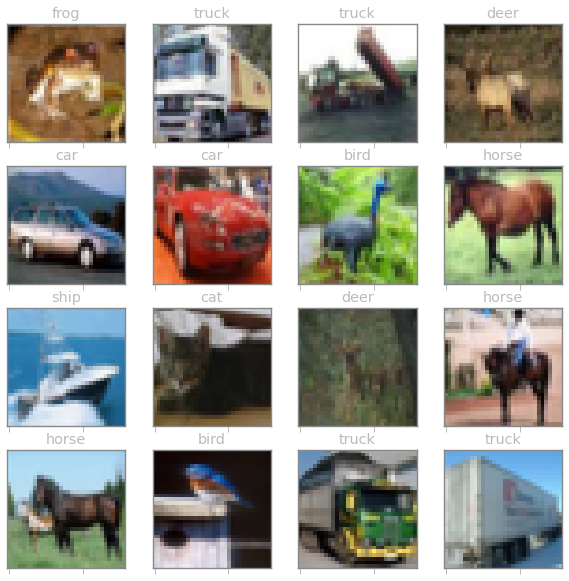

In [4]:
# View some images
fig, axs = plt.subplots(4, 4, figsize=(10, 10))
for i in range(4):
    for j in range(4):
        img, label = dataset[i*4+j]
        axs[i][j].set_title(classes[label])
        axs[i][j].imshow(einops.rearrange(img, 'c w h -> w h c'))
        axs[i][j].set(yticklabels=[])
        axs[i][j].set(xticklabels=[])
        axs[i][j].tick_params(left=False, right=False)

In [5]:
trace_tensor = torch.arange(64*3*32*32, dtype=torch.float32).reshape(64, 3, 32, 32)

model = MLPMixer(num_mixers=3,
                 channels=3,
                 img_width=32,
                 img_height=32,
                 patch_width=8,
                 patch_height=8,
                 lin_init_fn=torch.nn.init.kaiming_normal_)

model.eval()
out = model.forward(trace_tensor)
print(out) # This works
model = torch.jit.trace(model, trace_tensor) # Throws error

tensor([[ 1.5590,  1.6609,  1.6054,  ..., -1.5924, -1.5963, -1.5961],
        [ 1.5577,  1.6598,  1.6073,  ..., -1.5928, -1.5961, -1.5962],
        [ 1.5577,  1.6598,  1.6073,  ..., -1.5928, -1.5961, -1.5963],
        ...,
        [ 1.5597,  1.6619,  1.6094,  ..., -1.5948, -1.5982, -1.5983],
        [ 1.5614,  1.6637,  1.6110,  ..., -1.5965, -1.5998, -1.6000],
        [ 1.5630,  1.6654,  1.6127,  ..., -1.5982, -1.6014, -1.6016]],
       grad_fn=<NativeLayerNormBackward>)


RuntimeError: Cannot insert a Tensor that requires grad as a constant. Consider making it a parameter or input, or detaching the gradient
Tensor:
Columns 1 to 10-0.3572  0.1789 -0.2768 -0.4560  0.4632  0.1741  0.0881 -0.0620  0.3784  0.3945
-0.1766  0.0975  0.4151 -0.4067 -0.1118 -0.0206 -0.2347  0.2013  0.0062  0.2007
-0.0671 -0.1299 -0.0879  0.0212 -0.0009  0.1619  0.2396 -0.1525  0.0887 -0.1425
-0.1091 -0.0524  0.3193  0.1713 -0.4975  0.0255 -0.2892  0.0421  0.0908 -0.0417
 0.0699 -0.2095 -0.3226 -0.4302 -0.4590 -0.2315  0.1032  0.1223 -0.0825 -0.0310
 0.0891 -0.0355  0.3699 -0.2030 -0.3509  0.1669  0.1401 -0.1948 -0.0115  0.2478
 0.0030  0.0230 -0.1044 -0.1456  0.1676  0.1711  0.2694  0.1130  0.0806 -0.4547
 0.0873 -0.2996 -0.0316 -0.0971 -0.3081 -0.0350  0.1807  0.2117  0.1298  0.0799
-0.0508 -0.1544  0.4253  0.0138  0.2925 -0.2429  0.1913  0.1286 -0.2957 -0.1586
-0.0933  0.0424  0.0764 -0.2422  0.1664 -0.1111  0.1017 -0.3364  0.0769 -0.0440
 0.1315 -0.3233  0.3987  0.0602 -0.1236 -0.1033 -0.1245  0.0994  0.1666  0.0872
-0.0531 -0.1819  0.1888 -0.2343  0.1203 -0.3067 -0.0148 -0.3487 -0.4846  0.3523
 0.0616  0.1708 -0.0238  0.0005  0.0082 -0.0853  0.3892 -0.0462  0.4852  0.1132
 0.1983  0.1458 -0.0865  0.0081  0.0254  0.0192  0.0767  0.0386  0.1984  0.0872
 0.0751 -0.0734  0.0133  0.0831 -0.2147 -0.0539 -0.1002  0.0252 -0.3223  0.0452
-0.0104  0.2705 -0.3368  0.2209  0.2893 -0.2309  0.1583  0.1044  0.1601 -0.0242
 0.4093 -0.0075  0.1618 -0.2552  0.4720 -0.0577 -0.2091  0.0783 -0.1786 -0.0071
 0.2338 -0.1193 -0.1850  0.2944  0.0953  0.2378 -0.2491  0.0303 -0.0754  0.0611
 0.0983  0.0215 -0.1579 -0.1800  0.0488 -0.2002  0.0776  0.3210 -0.1128  0.0415
-0.2455  0.5800 -0.5000 -0.1053 -0.1928  0.2141 -0.0350 -0.0073  0.3895 -0.1977
 0.0573 -0.0760 -0.0540 -0.0667  0.1400 -0.1095  0.0209  0.2612  0.2222 -0.3399
-0.1104 -0.0380 -0.2022  0.4350 -0.1643 -0.0474 -0.0394  0.1929  0.2968 -0.0847
 0.1130  0.1906  0.0705  0.2924  0.2784  0.5299  0.0093 -0.0397 -0.0505  0.4505
-0.0950 -0.1178  0.0486  0.1962  0.3513  0.2250 -0.1365 -0.2414  0.0524 -0.2302
 0.1353  0.3497  0.1152 -0.0609  0.0359 -0.0059  0.3234  0.0799 -0.1294  0.3495
-0.0688  0.1351 -0.2971 -0.1117  0.2799  0.1126  0.1004 -0.0488  0.0347  0.1579
-0.2135 -0.3839 -0.2793 -0.1053 -0.0991 -0.1795 -0.2029  0.1984  0.0858  0.0272
 0.3513  0.2502 -0.0431 -0.2408 -0.1264  0.2009  0.0097  0.5244 -0.2590 -0.1472
-0.5392 -0.1518 -0.1890 -0.1943 -0.0004 -0.2863 -0.2052 -0.4189 -0.0260 -0.2169
-0.2567  0.2620 -0.2825 -0.0624  0.0707 -0.0586 -0.1174 -0.2362 -0.2349 -0.1964
 0.2959  0.0178  0.1644  0.0644 -0.1982  0.1266  0.1488  0.0517 -0.0448 -0.1864
 0.3650  0.1502 -0.2093  0.1799 -0.1178  0.1069 -0.2047 -0.0389 -0.2584 -0.1786
 0.0532 -0.0848 -0.1069 -0.0434 -0.1028  0.0011  0.2970  0.0202  0.2736  0.1004
 0.1624 -0.0101 -0.1313  0.0207 -0.0107 -0.3751  0.1068  0.1027  0.0517  0.1816
 0.0446 -0.8168  0.0422 -0.2422  0.0896  0.0691 -0.2195  0.1659 -0.4384  0.0629
 0.0639  0.0069 -0.0291  0.0780  0.1333  0.2181 -0.1137 -0.2752  0.0239  0.3364
 0.2278  0.2372  0.1152  0.0801  0.2792 -0.0420 -0.0890 -0.1236  0.1677 -0.0956
 0.1797  0.2584  0.0667  0.3789 -0.0431  0.1673 -0.1646  0.1271 -0.0391  0.0627
 0.1631  0.0437  0.0138  0.0509 -0.0277 -0.2265  0.1745 -0.1860  0.2088  0.3244
-0.0772  0.0211 -0.1669  0.2515  0.4723 -0.4673  0.3691  0.1053 -0.0831  0.2498
 0.2940  0.3621 -0.1586 -0.1351  0.5539 -0.0166  0.0872 -0.4319  0.2284 -0.2319
-0.0591  0.1517  0.1538  0.1419  0.1539 -0.0025 -0.1355  0.0018  0.1773  0.1187
 0.1587 -0.1767  0.0920  0.0121  0.0207 -0.0251  0.1940  0.1556  0.0479  0.1811
-0.1224 -0.0308  0.3140 -0.2237 -0.0644 -0.3136  0.5687  0.3288  0.0009  0.1180
-0.0207 -0.1665 -0.3770 -0.0355  0.2142 -0.0074 -0.1359  0.2050 -0.0028 -0.3729
-0.0436  0.1061  0.2299 -0.1945 -0.2451 -0.3027 -0.0093  0.1558 -0.1000  0.2364
 0.1881  0.2824  0.2418  0.1314  0.5265 -0.0093 -0.1254 -0.0573 -0.1458 -0.3780
-0.0384 -0.1218 -0.1429  0.2117 -0.1338  0.0997  0.0791  0.1413 -0.1223  0.2479

Columns 11 to 20-0.0469  0.0998  0.0273 -0.2351 -0.4913 -0.1465  0.0247  0.0967 -0.5638 -0.0884
 0.2749  0.0923 -0.1905 -0.0209 -0.1685  0.2973  0.0246 -0.1103 -0.0810 -0.1455
 0.1667  0.3376  0.1013 -0.0489  0.0426  0.2045 -0.3429 -0.1530 -0.1759 -0.1973
-0.1699 -0.2583 -0.1933  0.2338  0.0963  0.0373  0.3581 -0.3863  0.1639  0.0489
 0.2247 -0.2457  0.0418 -0.0605 -0.3696  0.0328  0.3691  0.0743 -0.2068  0.1847
-0.0611  0.0225 -0.1036  0.0992  0.2578 -0.0525  0.0859  0.0047 -0.2615  0.2457
 0.1242 -0.0727 -0.1688 -0.1990 -0.1260 -0.0344 -0.0165 -0.0191 -0.2526  0.3002
-0.3002 -0.1078 -0.3658  0.3473 -0.2864 -0.0617 -0.0426 -0.0914  0.0801  0.0683
-0.1667  0.2603  0.0365  0.1937  0.0701  0.2008  0.1019 -0.1565 -0.4092 -0.0441
 0.2034 -0.1355 -0.3448 -0.2532  0.0791 -0.2851  0.0943  0.1524  0.0178  0.0331
 0.1382 -0.0897 -0.0838  0.1769 -0.0688  0.0041  0.0155 -0.2533  0.1932 -0.1133
 0.1639  0.3050  0.0949 -0.1174  0.2539 -0.6284 -0.2314  0.2573 -0.0381  0.1052
 0.1088 -0.1452 -0.2529  0.0188  0.2528 -0.3388  0.0147  0.0839  0.3006  0.1519
-0.0035 -0.0899  0.1017 -0.0274 -0.1544 -0.1775 -0.1278  0.0524  0.0951  0.0435
 0.0804 -0.1783 -0.1033  0.4947  0.0231  0.0034  0.2156  0.0124 -0.0808  0.1235
-0.0973 -0.1802  0.5159 -0.3074 -0.2211 -0.3960 -0.1075  0.2438 -0.1928 -0.1553
-0.1646  0.1591  0.1030 -0.1088 -0.0063 -0.3248 -0.1826  0.0211 -0.0560 -0.3049
 0.0206 -0.1345 -0.0851 -0.3176  0.1812  0.1112 -0.3314 -0.3688 -0.3902 -0.1168
 0.0602  0.0301  0.1397  0.0269  0.0266 -0.2121  0.0519  0.1086  0.0147  0.0662
-0.0452 -0.1443 -0.0557  0.4559 -0.1403 -0.1167 -0.1273 -0.1325  0.0753  0.2078
-0.2106 -0.0134 -0.3138 -0.4054 -0.0296  0.3150  0.0807  0.0813 -0.2261  0.0052
-0.3109  0.2924 -0.0653  0.2177  0.1767  0.1907  0.3477 -0.0381  0.1290 -0.0747
-0.0357  0.0446  0.2446 -0.3632 -0.0090 -0.0270 -0.0369 -0.1482 -0.3357 -0.0222
 0.0498  0.0738 -0.4105  0.1850  0.0156  0.1905 -0.2867  0.1147  0.2043  0.1177
-0.0472 -0.0151  0.1417 -0.2094 -0.0166  0.4118  0.4765 -0.0011  0.0693 -0.1216
 0.3157  0.0808 -0.3359 -0.0341  0.0965  0.0968  0.1350  0.2648 -0.0428  0.1051
 0.1915 -0.1838 -0.2175  0.0976 -0.0092  0.6146 -0.3010  0.2140  0.3097 -0.0349
 0.0784  0.3968 -0.2874 -0.0529  0.3756 -0.0205  0.3597 -0.0500  0.3254 -0.1388
 0.3854 -0.2618  0.2026  0.1629 -0.0083 -0.2651 -0.0781  0.0274  0.0032 -0.0786
 0.1586  0.1139  0.1732 -0.1008  0.1675  0.0252  0.2746  0.1730 -0.2409  0.2030
-0.2811 -0.2853  0.0240  0.0217  0.2699  0.0770  0.2091 -0.3680  0.4270  0.0227
 0.0049 -0.1645  0.2257  0.0093 -0.0509  0.0686 -0.1749  0.0148 -0.1929  0.0251
 0.0607  0.3065  0.0134 -0.2157  0.3336 -0.0347  0.1217 -0.0245 -0.1204  0.2208
 0.1121  0.0442 -0.0392 -0.0230 -0.2673 -0.0741  0.2119 -0.0298 -0.4626 -0.1645
-0.0563  0.0058 -0.0527 -0.3806 -0.1542 -0.4746 -0.1256 -0.0790  0.1168 -0.3062
-0.1287  0.1652 -0.3843 -0.2467 -0.1552  0.1993  0.2495  0.1849  0.0416 -0.1528
 0.0514  0.1043 -0.1706  0.0320 -0.0846 -0.1388 -0.1730  0.0492 -0.2350  0.1281
-0.1051  0.0770  0.3204  0.2395  0.0402  0.0472  0.1471  0.2757 -0.1167 -0.1694
 0.2166  0.1325  0.3761 -0.1818  0.2334 -0.1947  0.1230 -0.2286  0.1214 -0.2481
-0.2360  0.0513  0.2640  0.3208  0.1690  0.3789 -0.0920  0.1058 -0.1868  0.1532
-0.0004  0.3181 -0.0281 -0.2593 -0.2510 -0.1232  0.0251 -0.0737 -0.0412  0.3408
 0.3102  0.0171 -0.1703 -0.0076 -0.2581 -0.1827 -0.1556  0.4007  0.0312 -0.1205
-0.0743  0.0618  0.1830  0.2764  0.4748  0.0917  0.1302  0.0172  0.0194 -0.0962
-0.0251 -0.0778 -0.0796  0.1956  0.0683 -0.2686  0.1426 -0.1662  0.4539  0.0671
 0.0149 -0.3931  0.4209 -0.3132 -0.4201 -0.0491 -0.1207 -0.2676 -0.0240  0.2389
-0.1444  0.0650  0.7530  0.2685  0.0399 -0.4086  0.3155  0.3385 -0.1151  0.0926
 0.0102  0.0690  0.0178 -0.0837 -0.1718 -0.1366  0.0657 -0.1320  0.0464 -0.4406
-0.0970  0.1137 -0.1309 -0.0923  0.0507  0.0133 -0.2492 -0.0690  0.0533  0.1107

Columns 21 to 30 0.1707 -0.1609  0.0851  0.0200 -0.0715  0.2080  0.1717  0.0538  0.0399  0.1744
 0.2531  0.1072 -0.2133  0.1187 -0.3829 -0.0677 -0.0131 -0.1985 -0.1783  0.0827
 0.1024 -0.3686  0.3729 -0.1974  0.3421 -0.0041  0.0598  0.1255 -0.2018  0.1237
-0.2581 -0.0162  0.0806  0.0792  0.0070 -0.0556  0.2987 -0.0205 -0.0835  0.3960
-0.1210 -0.2595  0.1212 -0.2390  0.1935 -0.3031  0.3587 -0.1509 -0.0895 -0.1284
-0.2592  0.5648 -0.2472  0.1205 -0.0052 -0.2126  0.0990 -0.0192 -0.1216 -0.0326
-0.0842 -0.1603  0.0144  0.3306  0.0856  0.2870  0.0381  0.0013  0.1964  0.0357
-0.2624  0.0240  0.1197 -0.3143 -0.1502  0.2520 -0.5207  0.1257 -0.1948 -0.2391
-0.0464  0.1521  0.2875  0.5105 -0.3532  0.0742  0.0142 -0.0212 -0.3137 -0.0072
-0.1870 -0.1552 -0.0327 -0.1946  0.4232  0.3559 -0.0841 -0.2347 -0.0995  0.3583
 0.0903 -0.2346 -0.2425  0.0543  0.3220 -0.1637  0.4062 -0.1087  0.0180  0.0028
 0.1803  0.1137  0.0595  0.1378  0.0831 -0.0265  0.0403  0.0647  0.1706  0.1533
 0.3366  0.3557  0.4185  0.3287  0.1787 -0.2689 -0.3253  0.2695  0.0467 -0.1240
 0.0603  0.0041 -0.0042 -0.0521 -0.1346 -0.0484 -0.4322 -0.2225  0.0686  0.1959
 0.1344  0.1743  0.3662 -0.0452 -0.0592  0.2247  0.3503 -0.1686 -0.1282  0.3391
 0.0213  0.1921 -0.1332 -0.0689  0.1227 -0.3629 -0.0653 -0.3023 -0.0286  0.1742
-0.1291  0.0190 -0.3446  0.2299  0.0317 -0.0053 -0.5386  0.0905 -0.4091  0.1639
 0.1006  0.1962  0.2970 -0.1100  0.4671  0.0679  0.1463 -0.0993  0.1721 -0.0775
-0.1764  0.4155  0.0696 -0.0533 -0.3570 -0.0360  0.1738  0.0905  0.0654 -0.3793
 0.2411  0.1160  0.1876 -0.0786 -0.1132 -0.2290  0.0248 -0.1784 -0.1254 -0.0527
 0.1788  0.0255 -0.1872 -0.3360  0.2066  0.2021  0.0742  0.2869  0.2262  0.0224
-0.3109 -0.1481 -0.1677  0.0495 -0.1292 -0.1153  0.1148  0.0243 -0.1353  0.0789
 0.1347  0.0698  0.0898 -0.1985  0.1461 -0.0302 -0.0345  0.0588 -0.0325 -0.2699
-0.1004  0.0605  0.1620  0.1070 -0.3183 -0.1937 -0.1036 -0.1275  0.0516  0.3097
 0.0091 -0.1272 -0.2089  0.1950  0.3604 -0.0360  0.2090  0.2160 -0.0540  0.1289
 0.2019  0.0185  0.3006  0.1431 -0.0622  0.1028 -0.0125  0.3253 -0.0601  0.3346
 0.1559  0.2763 -0.3012 -0.0039  0.1692 -0.1002  0.0768 -0.0247  0.2943 -0.0154
-0.1010 -0.0370 -0.1783  0.2373 -0.3331  0.3458 -0.2323  0.1417 -0.0479 -0.1159
-0.0651  0.2864  0.1755 -0.1530  0.0747 -0.1210  0.1539  0.0250 -0.4395 -0.0059
-0.0695  0.1776  0.2107  0.1932 -0.3266  0.0229 -0.1734  0.1168  0.1259 -0.2974
 0.0349 -0.1243  0.0088 -0.0650  0.0392 -0.0652 -0.3403 -0.0607 -0.2579 -0.1522
 0.0310  0.2108  0.0693 -0.1913  0.4123  0.1234 -0.2731 -0.0704 -0.1888 -0.0926
 0.0378 -0.3315  0.0252  0.4817 -0.0985  0.1693 -0.4783 -0.1128  0.0055  0.1622
 0.0947 -0.2656 -0.1449 -0.1163 -0.0762  0.1181  0.2003 -0.0233  0.0039  0.0502
 0.1179 -0.2330 -0.1174 -0.1072  0.4121  0.1901 -0.1860  0.1522 -0.2742  0.1419
 0.1076  0.1581 -0.0085 -0.1176 -0.0534  0.3250 -0.1315 -0.3990  0.2767  0.1388
 0.0209 -0.2864  0.1002 -0.0303  0.4294 -0.2750  0.0200 -0.1768 -0.1368  0.1524
 0.3742 -0.1324 -0.0769 -0.5576 -0.3404 -0.0268  0.0097 -0.1035 -0.2395 -0.1317
-0.0603 -0.0970 -0.0122 -0.5638  0.3160  0.2500  0.0483  0.0020 -0.2147  0.0329
 0.0080 -0.3973 -0.1858  0.1213  0.0403  0.2366 -0.2286 -0.0590 -0.4519 -0.0477
 0.6359 -0.0860  0.2467  0.1157  0.2612  0.0596  0.1654  0.0679 -0.1362  0.1067
-0.0636  0.4942 -0.2805 -0.0855  0.0377 -0.0598 -0.1830  0.1543 -0.0370 -0.0282
 0.2960 -0.0498 -0.0426  0.2687  0.1671  0.0917  0.0601 -0.0657  0.2712 -0.0989
-0.3719 -0.1323  0.0862 -0.3172 -0.1093 -0.0076  0.1702 -0.0768  0.1966  0.2795
 0.2837  0.1342  0.3002  0.0689 -0.1861 -0.1309  0.0550  0.2094 -0.0004 -0.0686
 0.3870 -0.1661  0.0832 -0.1478 -0.0641 -0.0328 -0.2711  0.2926 -0.2015 -0.1523
 0.0151  0.2031  0.4923  0.1274 -0.0863  0.0004 -0.1735  0.2221  0.1278 -0.1143
-0.5592  0.5234  0.2634  0.2551 -0.0936  0.0716  0.1014  0.1596  0.3890  0.2543

Columns 31 to 40 0.3121  0.0544 -0.1310 -0.2048  0.1312  0.2798  0.0807  0.0730 -0.1910  0.3806
 0.2820 -0.1636  0.1416  0.0159  0.2952 -0.3689  0.2837 -0.0629  0.5160 -0.1086
-0.0227  0.2061  0.0287  0.0376 -0.1933  0.0878 -0.2354 -0.1918  0.0006  0.2872
 0.0473  0.0240  0.1954 -0.4559  0.1918 -0.1295  0.2680 -0.2672  0.1400 -0.0280
 0.0630  0.0842  0.1882  0.1335 -0.0417  0.0877  0.0015  0.2041 -0.0624  0.3155
-0.1092 -0.1807 -0.0942  0.1059 -0.0132  0.2349  0.3790 -0.1624  0.0867 -0.0622
-0.2140 -0.2972  0.2128 -0.2422  0.1878  0.1316  0.2877  0.1458  0.1772  0.0226
-0.0175 -0.3562 -0.0305  0.1959 -0.0202 -0.0245 -0.1921 -0.1469  0.1525  0.3532
 0.0076  0.3518  0.0770  0.1145  0.0433  0.0175 -0.0149  0.1063 -0.0878  0.4272
-0.0395  0.1578  0.3194 -0.0565  0.1390 -0.3591 -0.0899  0.2306 -0.0271 -0.0298
 0.0866  0.2363 -0.1564 -0.1206  0.1245  0.0187 -0.2805 -0.2020  0.0094 -0.1609
 0.0244  0.0045 -0.2846 -0.2181 -0.3947  0.0993  0.0803 -0.2879 -0.1485 -0.4665
 0.3306  0.1065  0.0402  0.1791 -0.1379  0.0597 -0.1538  0.1723 -0.1323 -0.1465
-0.0829 -0.0372 -0.1998  0.5720 -0.2252  0.2951 -0.2222 -0.1006  0.3341 -0.0957
-0.0928 -0.0298  0.0995  0.2241  0.2697  0.0978  0.1595  0.1849 -0.1567  0.0982
-0.0202  0.0439 -0.0407 -0.0925 -0.2029  0.0216 -0.1306 -0.0889  0.4637  0.1492
 0.0370 -0.0894  0.0998  0.1889  0.0805  0.0976 -0.0846 -0.0555 -0.1411  0.1252
-0.1140 -0.2131  0.4018  0.0324 -0.1121 -0.0035 -0.0879 -0.0741  0.1491 -0.1697
 0.1028  0.0491  0.1312 -0.2134  0.2384 -0.0178  0.1337 -0.0777 -0.0181 -0.2380
-0.2084  0.1071  0.1680 -0.3141 -0.2821  0.0234 -0.3078 -0.1754  0.0758  0.1778
-0.1928  0.1406  0.0365 -0.3325 -0.2053 -0.1662 -0.0240  0.0810  0.0483  0.0275
-0.0497 -0.2790 -0.0281 -0.1576  0.3932  0.2744  0.0933  0.0800  0.2699  0.1921
 0.3280 -0.1626 -0.1961 -0.0708  0.1569 -0.1276 -0.1451 -0.0754  0.0938  0.0029
 0.2145 -0.0731  0.3132  0.0859 -0.1104 -0.1839  0.3655 -0.1055 -0.1157 -0.0968
-0.0846  0.0320  0.1246 -0.1566 -0.3438 -0.0380 -0.1594  0.0707 -0.2543 -0.1941
 0.2853  0.0701 -0.2765 -0.0309  0.1259  0.2418  0.0645  0.0791 -0.2655 -0.2914
 0.1629 -0.1011 -0.0215 -0.1228 -0.2390  0.1068  0.1282  0.1317 -0.1043  0.1644
 0.0576 -0.1442 -0.0552 -0.0302  0.3428  0.0228  0.0269  0.3722  0.1410  0.1502
 0.0416 -0.1979 -0.0442 -0.4201  0.1851 -0.0871  0.0576 -0.2382  0.1090  0.2841
-0.0822 -0.0615  0.3882 -0.0869 -0.1905  0.0764 -0.0385  0.0455  0.1902  0.3274
-0.2119  0.0995 -0.0678  0.1556 -0.1676  0.1518 -0.4266 -0.2321  0.1875  0.1425
-0.1037  0.1144 -0.5640  0.0146  0.2281 -0.0943  0.0991 -0.2579 -0.1954  0.4028
-0.0788  0.0952  0.0629 -0.1145  0.0948 -0.1579  0.2974  0.2506  0.0093 -0.1451
 0.0457  0.2045  0.3123  0.0928 -0.1318 -0.0173 -0.3729 -0.2088  0.1717  0.0009
-0.2697 -0.0023  0.0543  0.0565 -0.1120  0.0089  0.0590 -0.2188 -0.1325 -0.0472
 0.0282 -0.0651  0.2039  0.2848 -0.4969 -0.0430 -0.1405 -0.1282  0.0906  0.2346
 0.1663  0.0630  0.1504  0.0295  0.1056 -0.0591 -0.1375  0.1876 -0.1261 -0.0160
 0.1579  0.3485  0.0047 -0.0277 -0.0805  0.1518 -0.1180 -0.0313  0.1574 -0.0453
 0.0850  0.3182 -0.1948  0.0176 -0.1455 -0.0653  0.2531  0.0919 -0.0176  0.2468
 0.0940  0.1443  0.3094 -0.2948 -0.0934 -0.3285  0.0706  0.0563 -0.1628 -0.1578
 0.2392 -0.1411  0.0948 -0.4320 -0.0209  0.2790 -0.0002 -0.3381 -0.3283  0.1847
-0.0431 -0.1813 -0.1800  0.0846 -0.3112  0.1294 -0.0108  0.0985 -0.1217  0.0751
-0.1346 -0.3656  0.0444 -0.2246  0.1999  0.0328  0.1680 -0.2285  0.0899  0.0198
-0.2674  0.0682  0.1194 -0.0285  0.0549  0.0738 -0.0459 -0.0965  0.0920 -0.2586
-0.1834  0.0714 -0.1427  0.2813 -0.0245 -0.0237  0.0202  0.1054 -0.0284  0.0338
-0.2745  0.3447 -0.0315 -0.0125  0.3096 -0.0625  0.3679  0.3949  0.1169  0.0810
 0.2583 -0.2260  0.0340  0.2520 -0.1605 -0.2976  0.4227  0.1027 -0.2091  0.2368
 0.2406 -0.0112  0.2576  0.2844  0.2158  0.1624 -0.0603 -0.2616 -0.2204  0.2044

Columns 41 to 48 0.0821  0.0687  0.0418  0.1057 -0.0900 -0.0796 -0.0624  0.3801
-0.1605 -0.2640 -0.1947 -0.1990 -0.0037  0.2241 -0.0202 -0.1219
-0.1074  0.0399  0.0770 -0.2663 -0.1952 -0.0440  0.0718 -0.1607
 0.1347  0.2983  0.0095  0.0402 -0.0669 -0.1670  0.1217 -0.1147
-0.0170  0.1884  0.1712  0.0703  0.3389  0.0523 -0.0305  0.0322
 0.0697 -0.0260  0.4065  0.3421 -0.1834 -0.2476 -0.0973 -0.0869
-0.0154 -0.0563  0.0709 -0.4870  0.1515  0.1113  0.0204  0.0309
-0.1867  0.1101  0.0361 -0.1830  0.0790 -0.1264 -0.2033  0.2363
 0.2199  0.0509 -0.1980  0.0284 -0.2285 -0.0902  0.2025  0.0769
-0.3461  0.3355 -0.1810  0.0058 -0.0899  0.1190  0.2054  0.1318
-0.2077 -0.0394 -0.3955  0.1221  0.0985  0.1064 -0.1742 -0.2962
-0.0440  0.0135  0.3004 -0.0234  0.2632 -0.1774  0.2853  0.1102
 0.2198 -0.0843  0.2637  0.2597 -0.2122 -0.0807 -0.0132 -0.1218
-0.2361  0.0720  0.2212 -0.1261  0.4413  0.1538  0.0730 -0.1438
 0.2024 -0.0641 -0.0509  0.1255  0.0382 -0.0130 -0.1712 -0.0516
-0.1574 -0.0363  0.0187  0.2694 -0.1456  0.2313 -0.0073 -0.1594
-0.0380  0.2060 -0.0059  0.0742 -0.3740  0.2135  0.0951  0.0081
 0.0115  0.3070  0.3627 -0.1978  0.0579 -0.0498  0.2537 -0.2985
 0.0273  0.4300  0.1362  0.1316 -0.2014 -0.2173 -0.3209  0.0392
 0.2460 -0.0312 -0.1560 -0.0504 -0.0167  0.3704  0.1866 -0.0474
-0.3798  0.3109 -0.3362 -0.0397  0.0648  0.1222 -0.3585 -0.0555
 0.2619  0.2039 -0.1012  0.1050  0.0498  0.1572 -0.1893  0.0035
 0.1415 -0.2886  0.0899 -0.0707  0.0424  0.1777  0.3501 -0.1734
 0.1399 -0.2611 -0.2868  0.3457 -0.1748  0.1949  0.1338 -0.0881
 0.1580  0.0630 -0.0468 -0.2960 -0.1503  0.0188  0.0795 -0.1949
-0.5033  0.1465  0.2286  0.0436 -0.0449  0.0296 -0.0824 -0.2450
-0.0082  0.0099  0.0578 -0.2255 -0.2040  0.1567  0.0360 -0.1749
-0.0570 -0.1931 -0.0498  0.4002 -0.1938 -0.3855 -0.1088 -0.3848
 0.0327 -0.2365  0.2389  0.2599  0.1378  0.2770  0.5438 -0.2209
 0.2867 -0.1676 -0.0204 -0.2251 -0.0483 -0.2713  0.0286 -0.2074
 0.0066  0.1163 -0.0185  0.0660 -0.0166  0.0753 -0.1925  0.1673
-0.0900 -0.0782  0.2006  0.2601  0.0548  0.0382  0.0159  0.0903
-0.2602  0.0275  0.1100  0.0742  0.1907  0.0104  0.0098 -0.0260
-0.1238  0.2652  0.2412  0.0442  0.4138 -0.0235  0.0255  0.2408
 0.4189 -0.0394  0.0681 -0.0547 -0.0441  0.1265 -0.1589 -0.6138
 0.1623 -0.0898 -0.1739  0.1413  0.2679  0.1268  0.4936 -0.1198
 0.2058 -0.0387  0.2104  0.1351  0.0302  0.0401  0.2276 -0.2265
-0.3341  0.0812  0.1215 -0.2129  0.0078 -0.1265 -0.2626 -0.3088
 0.2948  0.0957  0.1373 -0.0106  0.1929  0.2883 -0.3560  0.1158
-0.2426  0.0868  0.1246  0.1578 -0.0592  0.3526  0.0711  0.1140
-0.0684  0.0705  0.0120 -0.1962 -0.0096 -0.2410  0.2101  0.0729
 0.0023 -0.0751 -0.2290  0.1668 -0.1373 -0.0766  0.1632  0.1205
-0.0255  0.0127  0.1791  0.0252 -0.0967 -0.2754  0.0029 -0.0470
-0.2813  0.3264 -0.1575  0.1716 -0.1999  0.0213  0.0688 -0.0831
-0.1836 -0.1321  0.2446 -0.0528 -0.0477  0.0446 -0.4691  0.1018
 0.0675  0.0754  0.4512 -0.1465  0.0314 -0.1366 -0.2149 -0.0086
 0.1591  0.0672 -0.2782 -0.1215 -0.4294  0.1839  0.1992  0.2101
 0.2098  0.2251  0.1910  0.2788 -0.0223 -0.1342  0.0718 -0.1967
[ torch.FloatTensor{48,48} ]

In [134]:
class LightningMixer(pl.LightningModule):
    def __init__(self):
        super().__init__()

        self.model = MLPMixer(num_mixers=3,
                              channels=3,
                              img_width=32,
                              img_height=32,
                              patch_width=8,
                              patch_height=8,
                              lin_init_fn=torch.nn.init.kaiming_normal_)
        self.model = torch.jit.trace(self.model, torch.zeros(1, 3, 32, 32))
    
    def forward(self, x):
        return self.model.forward()
    
    def configure_optimizers(self):
        optimizer = torch.optim.Adam(self.parameters(), lr=1e-3)
        return optimizer
    
    def training_step(self, train_batch, batch_idx):
        imgs, labels = train_batch
        
        return train_batch

    def validation_step(self, val_batch, batch_idx):
        print(val_batch)
        return None

In [122]:
pl.Trainer().fit(LightningMixer(), torch.nn.CrossEntropyLoss())

GPU available: False, used: False
TPU available: False, using: 0 TPU cores


RuntimeError: Cannot insert a Tensor that requires grad as a constant. Consider making it a parameter or input, or detaching the gradient
Tensor:
Columns 1 to 6 1.3813e-01  3.0325e-02  2.4419e-01  1.9098e-01  4.5506e-01  1.9854e-01
-5.0545e-02  1.8992e-01 -7.0545e-03 -1.4926e-01 -5.5861e-02  1.6897e-01
 1.5145e-03  2.5943e-01  6.0215e-02 -2.1815e-02  1.6906e-01  3.3702e-02
 1.2086e-01 -7.7641e-02 -2.2224e-01 -4.4873e-02  7.0068e-04 -1.7754e-01
-1.8737e-01 -2.4237e-01 -8.1139e-02 -1.7492e-01 -3.8725e-01  2.1640e-01
-2.2300e-01  4.4953e-01 -1.6305e-01 -1.7873e-01  3.5736e-01  8.4940e-02
-2.2789e-01 -2.1617e-01  6.1128e-03 -2.9126e-02 -9.8445e-02  3.7320e-01
 1.4474e-01  7.9021e-02 -2.0172e-01  1.9090e-01 -1.7768e-02  5.1524e-01
-5.0991e-02 -3.9525e-01  2.9657e-01  1.3011e-01  1.0695e-01 -1.0447e-01
 8.3677e-02 -2.6870e-02 -1.8793e-01 -4.1364e-01 -1.2968e-01  5.1637e-02
 1.1791e-01 -2.3579e-02 -1.1001e-01  3.5879e-01 -2.4955e-02 -7.8867e-02
 1.6479e-01  4.2132e-01  3.3515e-01 -9.5312e-02 -2.9420e-01 -2.1386e-01
-7.5220e-02  3.5968e-01  1.6753e-01 -2.7603e-02  5.1304e-03 -1.7535e-01
 1.8247e-02  1.0566e-01  1.9918e-02  1.5122e-01 -1.0323e-01 -2.2520e-01
-2.7754e-01  1.1122e-01 -3.9328e-02  1.4506e-01  3.6141e-01  1.8753e-01
-1.2495e-01  9.5156e-02  3.0326e-01  2.5700e-02  3.2847e-02 -4.6842e-02
 3.6213e-01 -1.8552e-01  2.3466e-01 -1.1331e-01  1.0467e-01  1.0993e-01
-2.0935e-02  2.4315e-01 -1.6736e-01  1.0472e-02  1.4443e-01 -1.5283e-01
 1.0667e-01 -8.5935e-02  1.3337e-01 -2.8242e-01 -1.1517e-01  1.5505e-01
 7.6396e-02 -4.6294e-02 -1.4486e-01 -6.2338e-02  8.2523e-02  1.9336e-01
 1.8400e-01 -2.9276e-01 -2.7457e-01 -2.7818e-01 -1.5299e-01  1.4493e-01
-4.6576e-02 -8.1030e-03 -1.3410e-01 -3.7266e-01  1.0702e-01  1.2286e-01
-2.0418e-03 -2.1641e-02  3.8939e-02 -5.0626e-02 -3.0060e-01 -6.5131e-02
-2.7610e-02  3.1356e-01  2.3545e-01  2.7007e-01 -2.3073e-01 -1.4416e-01
-2.3892e-01 -2.6781e-01 -2.9021e-01 -1.7630e-01  5.4277e-03 -3.5678e-02
 4.0848e-01  3.2691e-01  2.6706e-01  1.3824e-01 -2.9121e-01  1.6442e-02
-3.7849e-02 -9.3339e-02 -2.6956e-01  1.0884e-01 -1.6428e-02 -4.7094e-02
 1.7170e-01 -1.5559e-01 -1.3854e-01 -1.4276e-01  1.0728e-01 -1.0919e-01
-1.2484e-01  2.0216e-01  2.5676e-01  3.8267e-01  1.5241e-01 -6.3320e-02
 1.0401e-01  7.8442e-02 -1.7634e-01 -3.7289e-01  2.1588e-01 -1.1788e-01
-3.2987e-01 -9.4357e-02  1.6818e-01  1.0780e-01 -2.0253e-01 -3.5412e-01
-2.0000e-02  1.7196e-01 -2.5552e-02 -1.6561e-01 -5.1429e-01 -2.5961e-02
 4.5656e-02 -4.7788e-01  3.9533e-02  2.6739e-01  2.3659e-02  2.9514e-01
 6.6028e-01 -1.4289e-01 -1.7859e-01 -9.1069e-02  8.9729e-02 -1.0098e-01
-1.4897e-01  1.9698e-01  1.3095e-03  9.2046e-02 -2.2156e-01  3.4390e-01
 7.8205e-02  1.2425e-01 -1.1394e-02  2.2240e-01  2.0434e-02  7.0679e-02
-8.3623e-02  1.9181e-01 -1.2130e-01 -1.2354e-01  3.6604e-02  4.0740e-01
-1.7898e-02  3.7571e-01 -9.6002e-02 -3.0227e-01 -5.1951e-01 -2.6490e-01
 1.7074e-01  8.7172e-02  1.0625e-01  3.9759e-02 -2.9265e-02  4.9752e-01
-2.1041e-01  4.3253e-02 -2.2348e-01 -4.9955e-01 -7.2831e-02 -1.4144e-01
-3.3985e-01  1.5532e-01  4.8609e-01 -1.7944e-01 -2.1892e-01 -3.1908e-01
-2.7302e-01 -3.8465e-01  2.2414e-01 -2.3974e-01  1.2788e-01 -3.4864e-01
 9.4916e-02  1.1939e-01  1.6002e-01  8.8007e-02 -7.9079e-02 -1.8467e-01
 1.9318e-02  3.0116e-03  3.9701e-01 -1.9546e-02  1.3360e-01 -9.9602e-02
-6.2033e-02 -5.6716e-01 -7.6441e-02  2.0520e-01  7.7089e-01 -5.9526e-01
 4.7800e-02  1.9359e-01 -3.1743e-01  2.3589e-02  6.4624e-02 -5.4645e-02
 1.2656e-01  3.5351e-02 -1.7809e-01  6.0401e-02  3.2741e-01 -8.8565e-02
 6.6333e-02  1.1864e-01 -2.2555e-01  4.3203e-01 -3.6965e-02 -5.7870e-01

Columns 7 to 12-1.2902e-01  3.5861e-01 -5.2885e-02 -2.2051e-02  3.7991e-02  6.7520e-02
 1.6130e-01  3.3458e-01  2.6162e-01  5.2045e-03  6.0299e-02  4.1543e-01
 6.7272e-02 -1.1697e-01 -1.3131e-02  1.1043e-01 -2.4903e-01 -9.7483e-02
 4.7510e-01 -3.4599e-01  1.5039e-01 -4.6626e-03 -1.7724e-01 -3.2962e-02
 7.6914e-02 -3.7840e-01  1.7334e-01 -1.7168e-01  1.1094e-01 -1.5165e-01
 9.6970e-02 -2.2410e-01  1.0958e-01 -1.5871e-01  2.3027e-03  4.0429e-02
-2.6683e-04  5.1708e-01 -2.1637e-01  3.5549e-03 -3.8510e-02  1.6096e-01
-7.1651e-02 -1.5650e-01 -1.9254e-01  1.4800e-02  4.7835e-02 -8.6626e-02
-2.4784e-01  2.5413e-01  3.8353e-01  9.3481e-02  2.5809e-02  2.1581e-02
-3.7021e-02  2.7290e-01  2.7596e-02  2.6747e-01 -2.2798e-01 -6.6071e-02
 5.0525e-04  1.2963e-02  6.3176e-02 -4.1454e-01 -1.0150e-01  1.1177e-01
 3.7595e-01 -1.7048e-01 -4.2632e-01  6.0038e-04  3.3365e-01  3.6323e-02
 2.3072e-01  1.8309e-01 -7.5588e-02  2.7007e-01  2.7547e-01 -1.4308e-01
-7.1447e-02  1.5439e-01 -3.7931e-01 -1.6641e-02  1.7937e-01 -7.3963e-02
-1.7714e-01 -9.5992e-02 -8.1234e-04  2.3930e-01 -6.7399e-02 -6.5536e-02
 3.4194e-02  1.7905e-01  9.0042e-02  4.0096e-02 -2.7798e-01  2.2574e-01
-4.4669e-02 -9.5838e-03  1.4942e-01  4.1397e-02 -2.5912e-01  1.1427e-01
-1.3686e-01  5.8693e-03 -1.1978e-01 -3.3397e-01 -1.4530e-01  5.6547e-03
 3.5455e-01 -9.7057e-02 -1.9106e-02  1.6109e-01 -3.9260e-03 -1.6597e-01
-7.5745e-02 -8.8534e-03 -3.0166e-01 -2.7008e-02 -8.0721e-02  2.5322e-01
 1.1630e-01  1.2208e-01  2.9477e-01 -7.1538e-02 -4.7654e-02 -2.4935e-01
 1.2183e-02 -4.5612e-02  4.6917e-02  9.7282e-02 -8.0677e-02 -2.1986e-01
-1.6474e-02 -3.6846e-01  3.4624e-01  2.4470e-01  8.1928e-02  9.0602e-02
 4.9238e-01  2.6669e-01  1.6837e-01  8.0283e-03  1.2361e-01 -5.9116e-02
 5.2640e-02 -2.0646e-01  1.1572e-01 -1.9907e-01  3.3687e-02  9.3572e-02
 2.6497e-01 -3.2368e-01 -3.4978e-01 -7.6742e-02 -2.1685e-02  2.4869e-01
-6.7581e-01 -2.5132e-01  8.0404e-02 -7.7713e-02  2.6033e-01 -2.8401e-01
 2.3766e-01  1.8606e-01  2.0393e-02  2.3596e-01 -2.1143e-01  2.2616e-01
-7.6497e-03  2.5622e-01  7.0585e-02 -2.0928e-02 -9.9195e-02 -5.6011e-02
 1.0584e-01  1.7196e-01  3.0584e-01  1.2629e-01 -1.8939e-01 -3.4435e-02
 2.1210e-01  1.7324e-01 -2.9913e-01  4.4744e-01  8.2866e-03 -2.4126e-01
-2.4033e-01 -9.0684e-02 -8.3720e-02  3.5054e-01 -6.1143e-02  1.2683e-02
-3.7305e-01  3.3380e-01 -3.1079e-01  5.4426e-02  1.6272e-01 -2.4220e-01
 1.6237e-01 -9.4565e-02  2.3574e-01  5.7930e-02  1.5952e-02  5.1915e-01
-3.0587e-01 -1.6333e-01 -2.1378e-01  4.2381e-02 -3.5466e-02  4.0795e-02
 1.8405e-01  5.0320e-01 -3.0899e-01 -2.0662e-01 -3.4985e-01  2.4448e-01
-2.3209e-01 -1.4208e-01 -1.2588e-01 -2.6455e-01 -2.6766e-01 -1.5247e-01
-1.0276e-01 -1.1464e-01  2.5630e-01  1.1959e-01 -1.3676e-01 -1.3077e-01
 1.8563e-01  6.2024e-02 -6.7098e-02 -1.4044e-02  1.6916e-01 -8.0546e-02
 2.6861e-01  8.3778e-02 -7.1174e-02 -4.0926e-01  3.4207e-01  3.8135e-02
 2.0204e-01  2.1376e-01  1.4551e-01  3.1049e-01  1.7508e-01 -2.9006e-01
-3.3425e-01 -2.0419e-01 -3.9949e-02  9.1126e-02 -8.1781e-02  1.1025e-02
-3.0133e-01 -2.2813e-01 -1.3278e-01  1.3608e-01  1.7988e-01  7.7633e-02
-3.1238e-01  2.7783e-01  2.3159e-02  5.2288e-01 -8.1142e-02 -2.0020e-01
-2.1203e-01  2.4316e-03  2.0175e-01  3.9076e-02  1.9254e-01 -8.9277e-02
 5.9157e-01 -2.3635e-02 -2.3679e-01 -4.3804e-01  9.1130e-02  2.0180e-01
 5.0154e-03 -2.1704e-01  2.2876e-01 -1.8177e-01  1.3632e-01 -5.7071e-02
-1.4335e-01 -4.6850e-01  1.0676e-01  3.8026e-01  3.2822e-02  2.2005e-01

Columns 13 to 18-1.1538e-01  1.4461e-01  1.6344e-01  9.3488e-03 -2.5799e-01 -2.7008e-02
-9.7367e-02 -3.8573e-01 -5.4627e-02 -4.1626e-02  2.4133e-01  2.8419e-01
-1.7141e-01  7.5297e-02  6.6352e-02  5.9098e-02 -1.3371e-01  2.7939e-01
-3.8279e-02  4.1860e-01  4.7662e-03 -3.1980e-01 -2.1580e-01  1.1921e-01
-1.3630e-01  4.9327e-02  2.5236e-01 -1.6139e-01 -1.1465e-02 -5.9497e-02
-1.0370e-01 -1.4244e-01  5.9801e-02  3.4251e-01 -1.0623e-01 -6.4847e-02
 4.3638e-01 -1.7717e-02  2.3590e-01  3.2709e-02  8.6001e-02 -2.2791e-03
 9.5098e-02 -1.3156e-01 -6.1610e-02 -5.7446e-02 -2.1830e-01 -1.3935e-01
-2.1829e-01 -7.5488e-02  1.2770e-01  4.6276e-01 -1.2299e-01  1.2646e-01
 4.7110e-02 -4.3399e-01 -3.6861e-01  3.7205e-01  2.3517e-01  4.5021e-01
 1.9962e-01  3.0047e-01 -1.1791e-01  2.9256e-01  1.6192e-01 -1.3175e-01
-1.3474e-01 -5.0331e-02 -1.0879e-01 -2.2962e-01  6.4523e-02 -6.7322e-02
-1.4373e-01 -4.5324e-01 -1.5449e-01  1.6247e-01 -8.8898e-02 -3.5737e-02
 6.9690e-03  1.0261e-01 -1.2230e-01 -1.0284e-01 -1.0559e-01  6.4501e-02
-3.1897e-01 -1.6176e-01 -1.0616e-01 -3.0617e-01 -3.7777e-02 -1.0766e-01
-3.2332e-01  3.9969e-02 -6.0124e-02 -2.3783e-02 -3.8723e-02 -2.8681e-01
 2.7557e-01 -1.2875e-01 -1.5478e-01  1.8649e-03  1.2192e-01  6.3734e-02
 2.2400e-01  4.1579e-02 -3.7234e-01  4.1310e-02  4.9448e-03  4.3892e-01
 1.2139e-02 -3.3128e-01 -1.3759e-01  2.9184e-01 -1.7813e-01  3.8859e-01
 3.4287e-01  2.0035e-01  6.8754e-02  1.1210e-01  1.3272e-01  2.6722e-03
-8.1713e-02  2.0881e-01  3.8077e-02 -1.5786e-01 -2.5447e-01 -4.8542e-03
 3.9438e-05 -1.9049e-01  3.4315e-01 -7.0976e-02 -7.2647e-02 -4.7589e-01
-2.8598e-01  7.9450e-02 -1.1231e-01  1.1853e-01 -1.8139e-01 -3.8347e-01
-3.7311e-01  1.2035e-02  1.1877e-01  4.4210e-01  7.2949e-02 -2.9207e-01
-3.8890e-01 -2.4537e-01 -5.2189e-02  1.6242e-01  1.5626e-01  6.6155e-02
-1.6997e-01 -6.7829e-02 -2.8504e-01  6.1186e-03  4.5575e-02  1.5141e-01
 2.5483e-01  5.8321e-02  6.1264e-02  1.6259e-01 -2.4283e-01 -5.3572e-02
 7.3469e-03 -3.1066e-01 -6.2916e-02  3.2830e-01  7.2162e-02  9.0725e-02
 4.5251e-01 -1.3202e-01 -3.1166e-02  3.9330e-02  1.4550e-01 -8.1135e-02
-2.8088e-01  1.5207e-02  2.3267e-01  2.0623e-01 -1.1661e-01  2.0895e-01
 4.9915e-02  7.0796e-02 -1.4555e-02  3.3019e-01 -1.0098e-02  1.5709e-01
 2.8846e-01  1.2706e-01  2.4362e-02  1.7354e-01  2.7455e-01 -1.7817e-01
 2.8481e-01 -1.9595e-01  1.4090e-01 -9.7543e-02 -4.5847e-02  2.4553e-01
 4.1710e-02  4.1160e-01 -1.2800e-01 -1.0842e-01  2.3261e-02 -1.2331e-02
-2.4312e-01 -1.4583e-02  2.4562e-03 -8.3180e-03 -1.7179e-01 -9.3119e-02
-2.2467e-01 -8.9654e-02 -1.2879e-01  2.4423e-01 -3.5415e-02 -1.4014e-01
-1.0731e-01 -1.2961e-01  2.7584e-01 -3.5518e-01 -1.3308e-01 -1.0796e-01
 1.2071e-01 -8.6582e-02 -3.2641e-01 -2.8959e-01 -1.7649e-01  2.6376e-01
-1.6647e-03  8.8400e-02  4.2319e-01  3.6998e-01  9.2369e-02 -1.3161e-01
-1.1961e-01  1.0857e-01  7.6951e-02  2.9576e-01  3.0827e-01  3.1892e-01
 2.4559e-01  3.8019e-01 -3.2914e-01 -3.1877e-01 -2.6781e-01 -8.9752e-02
-2.4639e-01  1.2714e-01  5.3818e-01 -9.2757e-02 -8.0640e-02  2.9194e-01
-8.6312e-02  3.4007e-02  7.6412e-02 -2.7214e-01 -7.9578e-02  8.3918e-03
-3.0289e-01  1.9594e-01 -2.0987e-02 -1.6975e-01  1.7855e-01 -7.7782e-02
-1.9528e-02  1.5760e-01 -3.3042e-02 -1.9678e-01  2.2342e-04 -1.4586e-01
 2.3668e-01  3.1451e-01 -5.5542e-03  1.0581e-01 -5.1687e-01  4.5365e-02
-1.3405e-01  3.7134e-02 -5.0963e-01 -1.8168e-02  6.8869e-02  2.4439e-01
-1.9840e-01  3.3853e-01  6.3377e-02 -1.8987e-01  3.4586e-02  7.5178e-02

Columns 19 to 24-3.1930e-01  2.5625e-01  1.5433e-01 -8.8148e-02  2.1637e-02  1.2740e-01
 2.8505e-01 -7.8630e-02 -1.7198e-01  2.5679e-01  1.6350e-01  1.0365e-01
-1.1033e-01  4.8426e-02 -5.1474e-02 -1.4021e-01 -2.1196e-01  7.2485e-02
-1.9865e-01  2.7053e-01 -2.3277e-01 -4.1217e-01 -1.6757e-01 -2.6280e-01
 1.9911e-01  2.2601e-02  1.2552e-02  2.1282e-01 -1.7369e-01  9.6558e-02
 5.6558e-02  3.0544e-01 -5.2095e-01 -1.3293e-01 -9.1509e-02  8.6523e-03
-2.8166e-01 -4.1473e-01 -1.5797e-01 -2.0890e-01  9.7660e-03  1.8327e-01
-1.8222e-01 -1.8057e-01  1.7333e-01  7.2468e-02 -1.5156e-01  3.0423e-03
-2.7529e-01 -6.1323e-02  3.2296e-02  3.5875e-01 -2.1842e-01 -1.3490e-01
-2.7659e-01 -1.7431e-01  1.6923e-01  1.2621e-01 -2.4775e-01 -3.3813e-01
-2.7923e-02 -1.1111e-01  5.8195e-02  9.6078e-02  1.4818e-01  2.0195e-02
 8.2566e-03 -3.0112e-01  3.3248e-01 -6.5991e-02 -1.9126e-01 -2.9824e-01
 1.2481e-01  3.9102e-01  1.0742e-01 -3.4157e-01  9.3574e-03  4.6121e-02
 3.6550e-02 -3.0936e-01 -2.9792e-01 -3.3985e-04  2.8243e-01 -1.1907e-03
-1.2572e-01  5.4402e-02 -2.3646e-01  8.4201e-02 -1.9044e-02  1.6653e-01
 2.7820e-01 -6.1885e-02 -1.8001e-01 -1.9098e-01  3.0815e-01 -4.6375e-01
 2.5234e-01  1.4498e-02  8.2477e-02 -1.4474e-03 -2.6295e-01  1.4054e-01
-2.7419e-01  1.3428e-01 -2.4470e-02  4.1621e-01 -3.3613e-02 -1.8813e-01
-4.2136e-01 -1.8441e-01 -8.4171e-02 -3.8819e-01 -1.1212e-01 -1.3206e-01
 4.0828e-01 -1.0135e-01 -1.6251e-01  9.9989e-02 -3.5711e-02  1.0279e-03
 1.3186e-01 -3.3753e-01 -3.4990e-02  9.8269e-02 -4.8125e-01  6.0085e-01
-1.9853e-01 -1.5215e-01  6.2375e-02  3.9254e-02 -8.4302e-02 -3.8483e-01
-2.4979e-01 -2.1936e-01  1.4681e-01  4.9361e-02 -1.0287e-01 -2.2084e-01
-1.5444e-01  3.9382e-01 -1.1536e-01 -1.9919e-02 -1.0710e-01  9.2288e-02
-2.4834e-03 -6.4976e-02 -1.1933e-01 -5.3488e-02 -3.8860e-01 -1.5019e-02
-9.2337e-02  9.5321e-02 -3.7575e-01  2.4870e-02  1.0385e-01  9.8050e-02
 1.8905e-01 -1.1132e-01 -3.2549e-01  2.4461e-01 -1.5273e-01 -1.1219e-01
 5.1634e-02  1.7062e-01 -5.3939e-02 -2.0865e-01 -2.9967e-01  7.6473e-02
 3.4050e-01  2.8331e-01  1.8403e-01  7.4765e-02  2.5635e-01 -2.6487e-01
 1.9496e-01  2.0770e-01  2.5289e-01 -2.0122e-01 -1.9911e-01 -8.9367e-02
 8.7440e-02 -3.1155e-01 -2.7298e-01  5.8415e-01  8.8563e-02 -3.2271e-01
-1.3998e-01 -2.7293e-01 -2.4340e-01 -9.4123e-03 -1.6895e-01  9.2347e-02
 4.6353e-02  2.6642e-01 -1.0131e-02  5.9264e-01 -2.2132e-01 -1.3031e-01
-9.7150e-03  3.0069e-01  3.0901e-01  5.2474e-02 -3.3205e-01  6.6223e-02
 1.4411e-02  1.4206e-01  3.1542e-01 -6.2208e-02 -1.6316e-02  2.5860e-01
 2.1584e-01 -2.2367e-01  7.5282e-02 -1.2953e-03  5.1719e-02 -2.1267e-01
 1.1910e-01 -3.9102e-02  1.0432e-02 -8.4804e-02 -1.0101e-01  2.0260e-01
-4.0476e-02  7.0415e-02 -2.1324e-01  9.8561e-02  7.3401e-02 -8.3742e-02
 2.1667e-01  1.6357e-02  2.7583e-01 -1.0865e-01 -1.5301e-01  1.3766e-01
-7.0027e-02  1.5163e-01  3.7651e-02 -3.0831e-02 -3.8696e-02 -3.1310e-01
-3.4532e-02 -1.3757e-01  1.1875e-01 -1.3964e-01  8.5223e-02  9.4238e-02
 5.1595e-03  7.1699e-02 -9.0991e-02  2.6908e-02  7.7913e-02  2.1893e-01
 3.3565e-01  1.4806e-01  1.2267e-01 -4.7872e-02 -3.5262e-02 -1.3715e-01
 1.0765e-01 -3.2450e-02 -1.8439e-01  4.6350e-02 -9.7985e-02 -1.4631e-01
-5.1333e-02  1.6080e-01  1.0369e-02 -7.8544e-02  2.6080e-01 -4.8796e-02
 3.5204e-01  6.1922e-01  1.9009e-01 -6.9975e-02  2.4960e-01  7.9218e-02
-5.6352e-02 -4.5879e-01 -3.1794e-02  4.7161e-02 -5.9577e-02  7.6689e-02
 5.0650e-02  2.9664e-03  9.5672e-02  4.1285e-01  2.5888e-03 -1.6669e-01

Columns 25 to 30 8.2886e-02  1.3774e-01  1.0797e-01 -9.9926e-02  1.4850e-01  2.7625e-01
-2.7138e-02 -5.6957e-02  1.5219e-01 -2.0410e-01 -1.7434e-01 -3.2812e-01
 3.2500e-01 -3.1155e-01  3.5533e-01  1.4130e-02 -1.9598e-01 -4.9766e-02
-3.7849e-02 -8.3935e-03  1.7571e-01  1.1764e-01 -9.9685e-02 -1.2222e-01
-2.0293e-01 -2.2921e-01  2.9279e-01 -6.8383e-02 -1.6798e-01 -9.2418e-02
 1.6285e-01  3.6975e-01 -3.4152e-01 -2.6338e-01  1.0010e-01 -1.2953e-01
 1.7049e-01 -1.8724e-01 -6.4126e-02 -3.6244e-01 -5.7646e-02  2.2534e-01
-1.2907e-01 -2.8002e-01  2.8498e-01 -1.7816e-01 -4.2467e-01  1.7001e-01
 6.8597e-02 -1.7101e-01  3.9506e-01  2.6604e-01  2.3830e-01 -2.3574e-02
-3.5811e-02 -2.0045e-01 -1.8640e-01 -2.8002e-02  2.4579e-01 -4.2801e-01
-4.7259e-02 -1.7782e-01  9.6847e-02 -1.4162e-01  7.8134e-02  9.4391e-04
-1.4876e-01  1.0711e-01  2.7256e-01 -1.1386e-01 -4.2693e-01 -1.0237e-01
 8.8300e-02  3.6336e-01 -1.9220e-01 -1.3436e-02  7.0996e-02 -7.0452e-02
-1.6717e-01 -1.4223e-01 -2.9677e-01 -2.3547e-01  3.2737e-01 -1.9463e-01
-1.9644e-01 -1.9005e-01 -6.0126e-02 -2.2356e-01 -1.6663e-02 -2.5740e-01
 1.5605e-01 -1.9722e-01 -1.3362e-01 -3.2916e-02 -9.3391e-02 -2.4716e-01
 7.5466e-02 -8.4273e-02  4.2506e-01 -1.9367e-01  4.7948e-02 -2.8627e-01
 1.2160e-01 -2.6279e-02 -4.3732e-01  1.2964e-01  1.1469e-01 -1.4940e-01
-2.7160e-02  6.4446e-02 -1.3792e-01 -2.0830e-01 -1.4549e-01 -2.0868e-01
 1.3448e-01  3.3090e-01 -1.1148e-02 -1.0362e-02  2.8287e-01  2.1064e-01
 1.8197e-01 -3.6377e-01  3.0868e-01 -8.6697e-02 -4.8689e-01  2.0777e-03
 2.9350e-01  1.7987e-01 -5.2193e-02  1.5685e-02  1.3558e-02  5.2626e-01
-3.2322e-02  1.1881e-01 -3.6381e-01  3.3594e-01 -1.1514e-01  1.5185e-02
 9.6003e-03 -1.8615e-01 -5.4077e-01  7.6635e-02 -2.7393e-02 -8.9182e-02
 6.4375e-02 -9.0353e-02 -3.2654e-01 -7.8044e-02  9.1165e-02 -1.6844e-01
-6.6002e-02 -1.7723e-01  5.1284e-02  3.6416e-02 -1.0946e-01  4.0294e-02
 6.5269e-02  2.2273e-02  2.2349e-01 -1.4304e-02  1.4723e-02  2.9035e-01
 1.3709e-01  2.3986e-01 -4.8573e-02  1.4199e-01  4.6270e-02  1.1592e-01
 2.0959e-02  3.5053e-01  3.5257e-01  7.1785e-02 -3.3098e-01 -1.2974e-01
-1.6494e-01 -7.0942e-02 -3.0089e-01  5.5302e-02 -6.1587e-02 -1.1539e-03
 2.3403e-01 -1.5326e-01  3.7522e-01 -8.1008e-02  6.2576e-02 -4.2916e-02
-1.2167e-01 -1.9499e-01  8.9652e-02 -6.4598e-02  4.9699e-02  2.0058e-01
-7.7913e-02 -1.8929e-01  3.5529e-02  1.7864e-01 -3.1609e-02 -2.4818e-01
-7.0519e-02 -1.8019e-01  4.0574e-01  1.0922e-01 -2.8763e-01 -1.1541e-01
-8.5005e-03 -1.5400e-01  1.2468e-03  6.0635e-01 -5.0706e-02 -2.1770e-01
 4.9182e-02 -3.6596e-01 -9.8857e-02 -1.2409e-01  2.0604e-01  3.5919e-02
 6.5560e-02  1.9716e-01 -3.0935e-01  3.5418e-01  4.0901e-01 -3.0165e-01
 4.2216e-02  4.9152e-04  3.1432e-01 -4.3422e-02  2.2619e-02  9.2631e-02
 3.3080e-01  1.7715e-02 -2.2659e-01  4.8623e-02  6.0219e-02 -1.0114e-01
-2.5809e-01  4.0141e-02  3.8525e-01 -1.8296e-01  7.2449e-02  2.6009e-01
 1.3442e-01  3.2219e-01  1.2436e-01 -4.7610e-02 -1.6327e-01 -2.0287e-01
-1.7074e-01  3.0543e-02  9.9674e-02 -1.4988e-01 -3.1554e-01  1.0834e-01
 4.7284e-02  1.2995e-02 -6.2555e-02 -2.8627e-02 -2.0745e-01 -3.9868e-01
-2.5926e-01 -4.2666e-01  4.1650e-03 -3.1235e-01  2.9863e-01  7.2948e-02
-2.5312e-01  4.7618e-01 -2.0017e-01 -1.2286e-01 -3.4490e-01 -2.9339e-01
-4.3676e-02 -2.2196e-01  1.0368e-01 -1.4782e-01 -7.6036e-02  2.5685e-01
-3.4801e-02 -1.5988e-01 -9.9048e-02 -1.9695e-01 -1.0684e-01 -1.5138e-01
 5.1751e-02 -5.8218e-02 -4.3541e-01 -2.0526e-01 -2.2628e-01  7.6645e-02

Columns 31 to 36 1.3797e-01  1.4327e-01  1.0603e-01 -6.1128e-02 -7.3312e-02  1.8329e-02
 1.5575e-01 -4.0341e-01  9.8352e-02 -9.3567e-02  9.0876e-02 -5.1480e-02
-7.3829e-01 -1.0086e-01 -1.2277e-02  1.1194e-01  2.3353e-01 -3.5579e-02
-4.1245e-02 -3.0746e-02  1.6181e-01 -1.9622e-01  9.5838e-02  3.8209e-01
 1.1349e-01  1.3086e-01 -1.9363e-01 -1.6134e-02  1.7197e-02  4.6598e-02
 2.2684e-02 -8.6938e-03 -1.1858e-01  1.1071e-01  2.3980e-01  9.4102e-02
-1.0982e-01  7.9809e-02 -1.6414e-01 -3.7025e-02  9.0033e-02  7.8737e-01
 3.2564e-01 -2.6593e-02 -2.0641e-01 -5.2134e-02 -5.5559e-01  2.4755e-01
 1.8733e-01 -2.1553e-01 -1.0959e-01  2.1330e-01  5.8254e-02 -3.3529e-02
-5.1088e-01 -6.6701e-02 -6.1801e-02  3.3744e-01  2.6334e-01  1.6693e-01
 4.8971e-02 -1.2783e-01 -3.7677e-01  4.4483e-02  1.8948e-02 -1.5563e-01
-2.4937e-01 -2.1281e-02  8.0751e-02  8.7417e-02  8.6417e-03 -2.7573e-01
 2.7510e-01 -1.3141e-01 -2.6528e-01 -3.3139e-01  4.4191e-03 -6.7275e-02
 7.1992e-02  1.7786e-02 -1.6035e-01 -1.4983e-01  4.1295e-01 -1.3538e-01
-2.8998e-01 -3.2960e-02 -5.3370e-02 -2.4841e-01 -1.1008e-01 -1.8986e-01
 1.6251e-01  4.9910e-02  1.9169e-01  4.2719e-02 -1.5243e-01 -4.3471e-02
 5.9764e-01  1.0291e-01  2.7074e-01  1.0501e-01  3.1247e-01  4.0619e-01
-3.0572e-01 -1.2259e-01 -1.2392e-01 -7.8891e-02  2.4733e-02 -1.5621e-02
-2.1329e-01 -1.7070e-01  1.9011e-01  3.3925e-01 -3.2440e-02 -8.0112e-03
 1.7045e-01 -1.4153e-01 -3.5472e-01  3.8725e-01  3.4546e-02 -7.0917e-02
-6.0193e-01  1.5297e-01  8.9193e-02  1.2515e-01 -2.9194e-01 -3.3696e-01
-1.1184e-01 -1.9012e-01  5.5114e-02  5.2300e-02  6.7323e-01  8.9522e-02
 4.7967e-02 -6.3771e-02 -2.3918e-01  2.9663e-01  1.2662e-01 -1.0388e-01
 6.6806e-02  7.4289e-03  5.6173e-01 -3.7221e-01  2.1034e-01  1.0683e-01
 3.8078e-01 -2.2779e-01  7.0314e-03  3.1698e-02 -1.4520e-01 -9.5232e-02
-1.6496e-01  2.6721e-01  5.7106e-01 -1.4882e-01 -1.4625e-01  1.9303e-01
-1.1061e-01 -7.3913e-02  4.8946e-02  9.3750e-02 -5.6966e-01  1.9382e-01
-1.5907e-01  2.1137e-01 -2.1912e-01 -3.6655e-01 -7.6737e-02  8.4891e-02
-8.4888e-02  1.0842e-01 -2.0424e-01  7.2598e-02 -3.0012e-01 -4.4006e-02
-1.2008e-01  1.7122e-01  2.3417e-01  2.1129e-02 -3.7515e-02 -1.7718e-01
 1.8755e-03  1.3585e-01  4.7506e-02  5.4974e-02 -4.6852e-01  2.2220e-02
-9.2248e-02 -2.9099e-01  1.7302e-01  2.2646e-01 -2.4681e-01  1.2269e-01
-2.0375e-01  7.8178e-02 -3.0262e-01  2.0694e-01  1.3432e-01  1.3657e-01
-5.1190e-02 -9.5181e-02  2.1232e-01 -8.3459e-02  2.0694e-01  2.8578e-01
-9.8315e-02  2.1086e-01  9.5019e-02  5.6586e-02 -2.2633e-01 -1.4129e-01
 1.0980e-01  4.1021e-01  1.6586e-01  1.5504e-01  5.9304e-02 -1.7544e-01
-3.9313e-01 -1.3290e-01 -2.2239e-01  1.8137e-01  2.1508e-01  3.3661e-01
-1.0506e-02 -9.1225e-02  3.8742e-02 -9.1618e-02  2.9159e-02  2.0437e-03
 5.1316e-03  1.9230e-01 -3.2506e-03 -1.5471e-01 -5.6546e-02  2.5769e-01
 3.1923e-03 -2.9845e-01  1.0436e-02 -1.5886e-01 -2.4052e-02 -2.6793e-01
-2.3508e-01  1.1496e-02 -3.5481e-02  5.4394e-01  1.9816e-01  2.9925e-02
-1.9288e-01 -3.1563e-01 -3.0636e-01 -7.8061e-02 -6.4324e-02  5.3486e-02
 1.3361e-01  4.2012e-02 -2.7219e-01 -3.8767e-02  2.1985e-01  2.4765e-01
-5.5372e-01  8.2829e-02  1.3295e-01  2.8750e-01 -7.9606e-02 -2.7183e-01
 3.5192e-01  4.1487e-02 -1.4405e-01 -1.9780e-01  1.2487e-03  3.3396e-01
-2.3012e-01  5.3669e-02  8.7401e-02  1.5367e-01  4.4836e-02  4.6150e-02
-1.5499e-01  2.8587e-01 -3.8888e-01  7.1479e-02  2.5032e-01 -7.1522e-02
-3.4336e-01 -1.6285e-01 -3.3983e-02  8.5416e-02 -7.3159e-02 -1.7035e-01

Columns 37 to 42 2.7289e-01  3.7998e-01 -1.5799e-01  2.2375e-01  1.9810e-01 -6.1988e-01
-9.9859e-02 -2.8260e-01 -2.1557e-01 -1.4019e-01 -9.0435e-02 -9.1484e-03
 2.3484e-01 -8.0706e-02 -1.9365e-01 -9.0382e-02  8.4651e-02 -7.7570e-02
-5.1138e-02 -3.2847e-01  3.3252e-01  3.9504e-02 -1.0429e-01 -5.2655e-02
-1.0748e-02 -7.6438e-02  1.4695e-01  2.1911e-01 -3.4043e-01 -2.7120e-01
 1.8949e-02 -5.2310e-02  4.8394e-02 -2.5791e-02  2.9855e-01 -3.4093e-02
-1.9470e-01  4.0081e-01 -2.4618e-01  5.2765e-01 -1.1150e-01 -2.4769e-01
 4.8478e-02  1.0229e-01 -7.6169e-02 -3.0772e-02 -1.0267e-01  2.0053e-02
 2.9168e-01 -3.8289e-02  5.5010e-02  1.7097e-01 -1.2714e-01  3.6364e-02
 8.8633e-02 -1.8555e-01  6.7187e-02  2.3466e-02 -2.7124e-01  3.6161e-01
 1.0392e-01  3.7042e-01  1.1333e-01 -2.5541e-01 -3.8231e-01 -4.5394e-02
 9.5310e-02  5.5588e-02  5.0831e-01  1.6304e-01  3.3682e-01 -3.0839e-02
 1.8536e-01 -9.3259e-03  4.5821e-02  8.8223e-02  6.9103e-01 -1.2721e-01
 4.4170e-02  1.2330e-01  1.6300e-01  1.5979e-02 -1.1910e-01 -1.4049e-01
 6.9807e-02  1.2222e-01  2.0660e-01 -6.7903e-03  2.3330e-01  5.0951e-01
 1.1176e-01  2.8277e-01  3.6558e-04  3.5772e-02 -3.5870e-01  1.0075e-01
 4.7220e-02 -4.4702e-02  6.4505e-02  1.7899e-01  1.1876e-01  4.3051e-01
 4.6371e-02 -2.1807e-01  1.3221e-01  4.1546e-01 -2.0795e-01 -2.0765e-01
-7.8064e-02 -8.5700e-02 -3.8875e-02  2.0539e-01 -8.5933e-02  4.6696e-03
-7.3778e-02 -4.5748e-02 -2.0823e-01 -2.0783e-01 -4.7537e-02  2.2598e-02
 3.6154e-02 -1.0765e-01 -5.8507e-02 -2.1802e-01 -1.6346e-01  2.8819e-01
 1.4208e-01  1.1155e-01  1.2654e-02  2.1574e-01 -5.7208e-01 -2.9804e-02
 2.7445e-01  1.8201e-01  5.6170e-02 -1.1704e-01  5.3566e-02  2.3555e-01
-1.1254e-01 -1.2981e-01  2.3163e-01  2.6646e-01  2.3792e-01 -9.0740e-02
-1.9564e-01 -1.5355e-01  2.4717e-01 -2.9554e-01 -4.7343e-02 -3.6261e-01
-9.3028e-03 -2.3339e-01 -1.8569e-01  2.8991e-01  1.3370e-01 -2.3471e-02
-6.1075e-02 -2.2097e-01 -4.7077e-02 -1.6135e-01  6.7192e-02  1.8707e-01
 3.1364e-01  3.2268e-01 -1.8775e-02  2.2434e-01  1.3835e-01 -3.3684e-01
 1.1607e-01 -3.1540e-01 -3.2179e-01  2.5843e-01  7.2157e-02  2.3094e-01
 3.3007e-03  3.7879e-02 -2.8486e-01  3.7702e-01  1.3982e-02  1.5913e-01
-2.4166e-01  1.7101e-01  3.4281e-01 -1.4536e-02 -1.5548e-01 -2.1786e-01
-1.1516e-01  1.6434e-01 -4.0183e-01 -1.0282e-01 -2.1033e-02  9.8915e-02
-5.8615e-02  1.8832e-01  2.7965e-02  2.2313e-01 -7.4588e-02 -2.1488e-01
-1.3661e-01 -8.1707e-01 -1.7463e-01 -1.4920e-01  2.7840e-01 -2.1046e-01
 1.6122e-01  1.0767e-01 -1.7562e-01  1.1135e-01 -7.8747e-02  1.1138e-01
 2.1383e-01 -4.7885e-02 -6.4251e-02 -3.8020e-02  1.9995e-01  3.1549e-02
 2.9719e-01 -2.5230e-02  1.6738e-02  1.7306e-01  8.1504e-02  1.9175e-01
-7.2728e-02 -2.2158e-01  1.1723e-01 -4.5081e-02  2.0447e-02 -4.2679e-02
 3.4964e-01 -2.7375e-01  6.4134e-02 -1.5017e-01 -1.1393e-01  6.2201e-02
 3.1444e-01  5.8108e-02  1.2252e-01 -1.4764e-01 -3.0662e-03  1.1112e-01
-8.3050e-02  4.3966e-01 -1.9805e-01 -1.4215e-01  1.2596e-01  1.6984e-01
-1.7454e-01  7.6060e-02  4.4090e-04  2.7030e-02 -6.8831e-02 -5.7817e-02
-2.2801e-01 -1.0959e-01 -1.0550e-01 -4.2464e-02 -8.2883e-02 -2.0323e-01
-1.4070e-01  4.3402e-02  2.1823e-02  2.6234e-01  1.7354e-01  3.2998e-01
 1.4796e-01  8.8299e-02 -1.9393e-02  2.4750e-01 -1.7322e-01  6.8207e-06
-1.2159e-01 -1.0169e-01 -7.9417e-02 -4.0893e-01  1.6871e-01 -2.5949e-01
 2.9439e-01 -1.5919e-03 -1.7580e-01  4.1609e-01  1.5543e-01  4.4395e-03
 3.1517e-01  8.9517e-02  2.1911e-01 -4.8450e-01 -8.2512e-02  8.6029e-02

Columns 43 to 48 3.4331e-02 -4.7923e-03  3.3088e-01 -2.8861e-03 -8.1106e-02 -2.1277e-01
-3.0389e-02  1.1094e-01  8.3034e-02 -5.5981e-02  4.0047e-02 -9.2566e-02
 2.2888e-02 -3.4812e-01 -3.2378e-01  2.0147e-01  3.4308e-01  1.1829e-01
 2.2646e-01 -3.8494e-02 -1.1627e-01 -3.9967e-02 -2.3349e-01 -8.8034e-02
-5.7078e-01 -2.1198e-01 -5.2128e-02 -2.7610e-03 -1.3583e-02 -1.7824e-01
-7.8601e-02 -1.3344e-01  3.2271e-01  4.4039e-01  2.1638e-01  1.4794e-03
 2.3618e-01 -1.2396e-01  1.0035e-01  1.0547e-01  2.9863e-01  2.6875e-01
 2.4546e-01 -7.9935e-02  1.4725e-02 -4.5127e-02 -1.3871e-01 -1.3516e-01
 1.3958e-02  1.0154e-01 -1.2191e-01  3.0279e-01  2.6868e-01  7.8374e-02
 1.5061e-02 -2.1255e-01 -9.9116e-02  7.3519e-02 -2.3720e-01 -1.6999e-01
-9.4026e-02  8.4904e-02 -1.9641e-01  2.9297e-01 -2.7174e-01 -1.8751e-03
-2.0787e-02  1.1391e-01  3.2095e-01 -1.2152e-01  3.4196e-01 -5.9800e-02
 1.2196e-01  2.3687e-01 -1.9756e-01  2.4235e-02  2.2636e-01 -7.3605e-01
 3.2432e-01  2.6712e-01  1.7317e-01  3.4481e-03  4.5111e-01 -2.8054e-01
 5.6298e-02  6.2089e-01 -3.1146e-01  3.0356e-03 -1.4302e-02  7.2141e-02
-1.0284e-01  1.3693e-01 -1.3481e-01  7.7401e-02 -4.9155e-02  1.2256e-01
-2.3403e-01 -9.4943e-02  3.3909e-01 -2.6751e-01  1.4559e-01 -2.0525e-01
-2.8309e-02 -6.3206e-02  1.4070e-02 -3.7217e-01  2.1872e-01 -1.7528e-01
-2.0706e-01  3.8403e-01  1.5160e-01 -2.6499e-01 -2.9484e-02 -2.7001e-01
 1.3119e-01  1.5551e-01  4.8261e-02 -9.8128e-02  1.3522e-01 -1.8344e-01
-1.0862e-01  1.8903e-01  2.0553e-01  1.2745e-01  6.4401e-02 -1.3223e-01
-6.8632e-02  3.3220e-02  1.0882e-01 -1.8599e-02 -1.9171e-01  9.2341e-02
-5.1010e-01 -8.0858e-02  2.3570e-02 -2.5233e-01 -1.3399e-01  1.9255e-01
-8.6312e-02 -2.6618e-01 -9.4704e-02  8.9906e-02 -1.5821e-01  1.3175e-01
-2.9285e-02  9.4516e-02 -1.9023e-01  2.8207e-01 -1.5673e-01  1.2665e-01
 4.0221e-02  2.1070e-01  1.2855e-01  2.5348e-01 -5.1426e-02 -6.6909e-02
-9.7742e-02 -9.7309e-03 -2.2303e-02  1.2042e-01 -7.0951e-02  1.0879e-01
 2.2808e-01  1.4771e-01  1.5614e-01 -1.5018e-01  8.7240e-02  8.3865e-02
-1.9649e-01 -2.3052e-01  1.3733e-01  1.0284e-01 -3.6301e-01 -1.8703e-02
-1.9394e-01 -2.7920e-01 -1.3336e-01  2.9866e-01 -8.9839e-02  3.7768e-02
-1.0295e-01 -1.9829e-02 -2.0119e-01 -4.1917e-01  3.4280e-02 -1.8868e-01
-2.6175e-01 -7.1027e-02  1.6627e-01 -2.4061e-01 -1.5678e-01  3.7186e-01
 1.3628e-01 -1.2740e-01 -4.7537e-02  1.1247e-01 -6.1692e-02  2.7255e-03
-2.7500e-01 -8.9306e-02  1.0629e-01 -5.0124e-01  1.5751e-01 -4.5035e-01
 1.5212e-01  1.1013e-01 -1.0673e-01 -1.8148e-01  1.9742e-01  5.2411e-03
-4.3252e-01 -2.1239e-01 -3.2605e-01  3.0772e-01 -1.2497e-01  1.2303e-01
 2.5048e-01  1.2963e-01 -9.2422e-02 -1.4372e-01 -1.1687e-01 -2.1843e-01
 5.2361e-02  1.5184e-01 -2.8990e-01 -5.8822e-02 -2.6007e-01 -1.3073e-01
 6.6789e-02  1.0734e-01  3.1007e-01 -1.6027e-01 -8.4806e-02 -3.9690e-01
-1.8307e-01  1.6141e-01 -5.6207e-04  4.6263e-02  2.7335e-01 -7.3899e-03
 5.3840e-02  3.2676e-02  7.7202e-02 -2.1201e-01 -2.3131e-01 -4.0605e-01
 9.0034e-02  1.5775e-01 -3.2522e-01 -1.5547e-01  2.3889e-03 -2.1899e-01
 1.5891e-01 -1.0357e-01  4.7741e-02  5.7885e-02  1.1505e-01  2.0319e-01
 2.0649e-02 -9.9034e-03  4.5203e-02  3.6306e-01  2.0603e-01  4.2630e-02
 1.7967e-01 -2.4303e-01 -2.2768e-01 -4.1922e-02  1.5727e-03  9.2212e-02
 5.2487e-02 -1.6334e-01  3.9772e-02 -4.9771e-01 -1.3951e-02  6.2065e-02
-2.8840e-01 -3.5189e-01  5.4867e-02 -2.8550e-01 -2.9400e-01 -2.4453e-02
 4.3981e-02 -9.4420e-02  4.9406e-02 -1.9615e-02  1.6981e-01 -1.2658e-01
[ torch.FloatTensor{48,48} ]